# 1.  Integration Errors

## (a)

Explain error scaling in trapezoid and Simpson's methods:

**Trapezoidal method**
$(\Delta x)^2$ error arises from fitting straight lines over small intervals. Essentially, we are introducing error by assuming the curve is a line. We can compute the error by taking the difference between the value of the integral and the numerical result. 

$$
E = \int^{N}_{1}f(x)dx -  \Delta x \left[\dfrac{f(1) + f(N)}{2} + \sum_{m=1}^{N-1}f(m)\right]
$$

From wikipedia, if we Taylor expand $E$, we should find that it scales with the second derivative:

$$
E = -\dfrac{(\Delta x)^3}{12}f"(c)
$$
at some number c between 1 and N. Althought here the scaling is proportional to $(\Delta x)^3$, in practice we assume $(\Delta x)^2$ for small $\Delta x$, as it captures the leading behavior.
 
**Simpson's rule**
With this method, instead of fitting straight lines over small intervals, we use a quadratic approximation. 

Similar to the analysis above on the trapezoidal method, we find that the error in Simpson's method scales with the fourth derivative as shown below:

$$
E = -\dfrac{(\Delta x)^5}{90}f"(c)
$$
at some number c between 1 and N. Again, althought here the scaling is proportional to $(\Delta x)^5$, in practice $(\Delta x)^4$ captures the behavior of interest.

## (b) 

Start with $I = I_1 + \epsilon_1$ = $I_2 + \epsilon_2$ and plug in $\Delta x^2$ and $2\Delta x$ respectively. 

For trapezoid, 

$$
I_1 + (\Delta x)^2 = I_2  + (2\Delta x)^2
$$

$$
I_1 + (\Delta x)^2 - I_2  - 4(\Delta x)^2 = 0
$$

$$
I_1 - I_2  - 3(\Delta x)^2 = 0
$$

$$
\dfrac{I_1 - I_2}{3} \approx \Delta x^2 \approx \epsilon_1
$$

Similarly, for Simpson's

$$
I_1 + (\Delta x)^4 = I_2  + (2\Delta x)^4
$$

$$
I_1 + (\Delta x)^4 - I_2  - 16(\Delta x)^4 = 0
$$

$$
I_1 - I_2  - 3(\Delta x)^4 = 0
$$

$$
\dfrac{I_1 - I_2}{3} \approx \Delta x^4 \approx \epsilon_1
$$

## (c) Trapezoid method

In [19]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Read in the data from the file
sample_data = np.loadtxt('hw2_data.txt', delimiter=" ", unpack=True)
sample_x = sample_data[0]
sample_f = sample_data[1]

# Integrate function from x=1 to x=2

# Using trapezoid method

dx = sample_x[1]-sample_x[0]
I1_trap = dx*(sample_f[0]/2 + np.sum(sample_f[1:-1]) + sample_f[-1]/2)

print('Value of integral = I_1 = ', I1_trap)

Value of integral = I_1 =  1.4823547292600159


The integral computed above corresponds to $I_1$, as it used all the number of points and $\Delta x$. Now, compute $I_2$ by using half the points and $2\Delta x$. For this, skip points by 2. 

In [23]:
sample_xx = sample_x[::2]
dx2 = 2*dx #sample_xx[1]-sample_xx[0] 
sample_ff = sample_f[::2] #take half the points only


I2_trap = dx2*(sample_ff[0]/2 + np.sum(sample_ff[1:-1]) + sample_ff[-1]/2)
print("Value of integral using half the points = I_2 = ", I2_trap)

#Now, let's make sure we have the right rule using trapezoid method

print('\n')
print("\u03B5_1 = ", (I1_trap-I2_trap)/3)
print("\u0394x^2 = ", dx**2)

Value of integral using half the points = I_2 =  1.480507364959873


ε_1 =  0.0006157881000476243
Δx^2 =  0.0025000000000000044


## Simpson's method

In [22]:
# Now, using Simpsons method
I1_simpson = (sample_f[0] + sample_f[-1] + np.sum(4*sample_f[1:-1:2]) + np.sum(2*sample_f[2:-1:2]))*dx/3
I2_simpson = (sample_ff[0] + sample_ff[-1] + np.sum(4*sample_ff[1:-1:2]) + np.sum(2*sample_ff[2:-1:2]))*dx2/3
 
print('Integral using all points = I_1 = ', I1_simpson)
print('Integral using half the points = I_2 = ', I2_simpson)

#estimating error
print('\n')
print("\u03B5_1 = ", (I1_simpson - I2_simpson)/15)
print("\u0394x^4 = ", dx**4)

Integral using all points = I_1 =  1.4829705173600634
Integral using half the points = I_2 =  1.4829048187332485


ε_1 =  4.379908454321679e-06
Δx^4 =  6.250000000000022e-06


**Does this make sense given the known accuracy of the trapezoidal rule and Simpson's rule?**

Yes! We know that the Simpson's method is more accurate as it fits a quadratic function between adjacent points, instead of straight lines like the Trapezoid method. Therefore, it is no surprise that we find a much smaller error for the Simpson's rule, in fact, 3 order of magnitude smaller. 

Simpson's rule proves to yield smaller errors for functions well-approximated by parabolic segments. Additionally, we might be dealing with a smooth curve, hence the Simpson's rule is better. 

## (d) Compare to true value

In [26]:
I_true = 1.482974344768713

#using all points
print('True error trapezoid method = ', abs(I_true - I1_trap))
print("True error Simpson's method = ", abs(I_true - I1_simpson))

print('\n')
print("Trapezoid \u03B5_1 = ", (I1_trap-I2_trap)/3)
print("Simpson's \u03B5_1 = ", (I1_simpson - I2_simpson)/15)

True error trapezoid method =  0.0006196155086970467
True error Simpson's method =  3.82740864957043e-06


Trapezoid ε_1 =  0.0006157881000476243
Simpson's ε_1 =  4.379908454321679e-06


How does this compare to the approximations in part (c)?


Surprisingly well! Using the approximations provided in (b), we can estimate the errors in each method. In general, they agree in order of magnitude and even value. 

# 2. Chemical potential of a Fermi gas

## (a)
$$
N = V \int^{\infty}_{0} \dfrac{8\pi p^2 dp}{h^3} \dfrac{1}{1+e^{(\epsilon - \mu)/k_B T}}
$$

Simplifying the integral and changing integration variable p $\rightarrow$ x, we have the integral:

$$
\dfrac{N}{n_Q V} = \int^{\infty}_{0} \dfrac{4}{\sqrt{\pi}} \dfrac{\sqrt{x}}{1+e^x e^{-\mu/k_BT}} dx
$$

Integrate over x for different values of $\mu/k_BT$.

[0.00000000e+000 0.00000000e+000 1.06247796e-241 3.43719995e-145
 1.11196128e-048 1.76227399e+003 9.15623090e+003 1.97009321e+004
             nan             nan]


C:\Users\laura\AppData\Local\Temp\ipykernel_19196\537594642.py:3: RuntimeWarning: overflow encountered in exp
  return (4/np.sqrt(np.pi)) * (np.sqrt(x))/(1+np.exp(x)*np.exp(-mu_kB_T))
C:\Users\laura\AppData\Local\Temp\ipykernel_19196\537594642.py:3: RuntimeWarning: overflow encountered in double_scalars
  return (4/np.sqrt(np.pi)) * (np.sqrt(x))/(1+np.exp(x)*np.exp(-mu_kB_T))
C:\Users\laura\AppData\Local\Temp\ipykernel_19196\537594642.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (4/np.sqrt(np.pi)) * (np.sqrt(x))/(1+np.exp(x)*np.exp(-mu_kB_T))
C:\Users\laura\AppData\Local\Temp\ipykernel_19196\537594642.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  i = scipy.integrate.quad(chem_P, 0, np.inf, args=m)


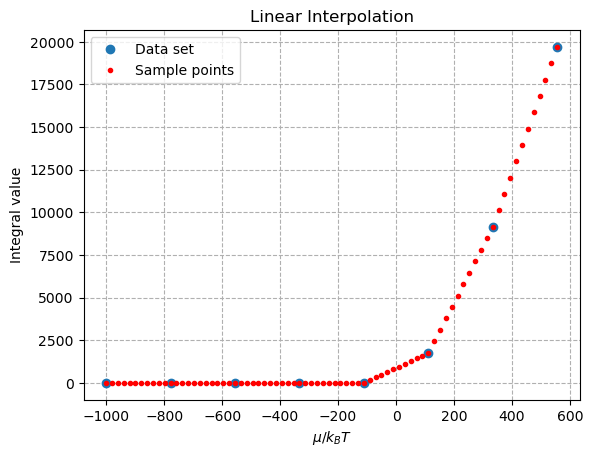

In [34]:
# set up numerical integration
def chem_P(x, mu_kB_T):
    return (4/np.sqrt(np.pi)) * (np.sqrt(x))/(1+np.exp(x)*np.exp(-mu_kB_T))

#integrate

# sample large and negative to large and positive
mu_kB_T = np.linspace(-1000, 1000, 10)


I = []
error_int = []
for m in mu_kB_T:
    #integrate for each of these values
    i = scipy.integrate.quad(chem_P, 0, np.inf, args=m)
    #populate array
    I.append(i[0])
    error_int.append(i[1])
    
#sample function
Ip = np.array(I)
print(Ip)

#set up interpolation
mu_interp = np.linspace(-1000, 1000, 100) #more points


#linear interpolation
I_interp = np.interp(mu_interp, mu_kB_T, Ip)


plt.plot(mu_kB_T, Ip, 'o', label='Data set')
plt.plot(mu_interp, I_interp, '.r', label='Sample points')
#plt.plot(x_interp, np.sin(x_interp), label='Sin(x)')
plt.legend()
plt.grid(linestyle='--')
plt.xlabel('$\mu/k_BT$')
plt.ylabel('Integral value')
plt.title('Linear Interpolation')
plt.show()

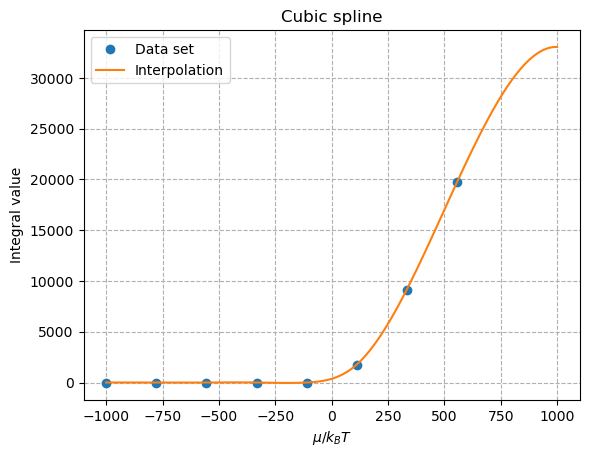

In [32]:
# try a cubic spline interpolation

# to set up the spline, get rid of nan values in integration
Ipp = Ip[(np.isnan(Ip)==False)]
mu_kB_Tp = mu_kB_T[(np.isnan(Ip)==False)]

spline = scipy.interpolate.CubicSpline(mu_kB_Tp, Ipp)

#call spline
I_cubic_interp = spline(mu_interp)

#plot
plt.plot(mu_kB_T, Ip, 'o', label='Data set')
plt.plot(mu_interp, I_cubic_interp, label='Interpolation')
plt.legend()
plt.grid(linestyle='--')
plt.xlabel('$\mu/k_BT$')
plt.ylabel('Integral value')
plt.title('Cubic spline')
plt.show()

The above interpolation uses scipy's cubic spline, and extrapolates data past 600 since the actual integral values are N/A. So this interpolates the data for larger, positive values of $\mu/k_BT$. This produces a much smoother curve than the linear interpolation. 

The interpolation function above returns $N/n_QV$ as a function of $\mu/k_BT$. We want the opposite! We want $\mu/k_BT$ as a function of $N/n_QV$. We can invert it. 

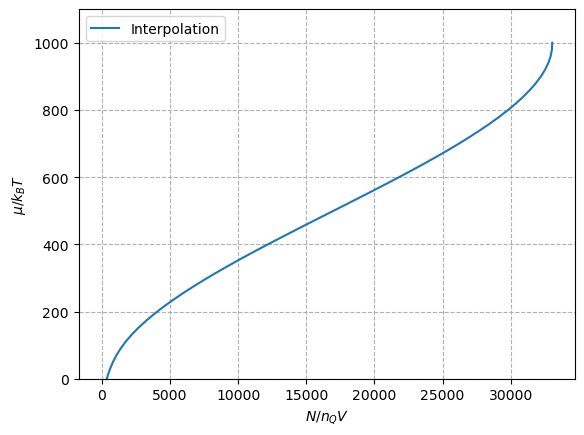

In [31]:
plt.plot(I_cubic_interp, mu_interp, label='Interpolation')
plt.grid(linestyle='--')
plt.ylim(0)
plt.xlabel('$N/n_QV$')
plt.ylabel('$\mu/k_BT$')
plt.legend(loc='upper left')
plt.show()

## (b) Sources of error

The sources of error in this calculation (interpolation) are related to errors from:

- How accurately we sample the function 
- How well the interpolation represents the behaviour of our function

More specifically, we can think of the following as sources of error:
- Resolution: how finely we sample the values across the range of interest. 
- Extrapolation: if we extrapolate beyond the range of sample data, it might lead to unreliable result. 

In the interpolation above, I do extrapolate beyond the values at which the integral is N/A.


## (c)
Now, we want to compare with the analytic limits of degenerate and non-degenerate $\mu$.

Rewrite the given formulas so they are in terms of variables we have.

**Non-degenerate**

$$
\mu = k_BT \text{ln}\left(\dfrac{n}{2n_Q}\right)
$$
where $n = \dfrac{N}{V}$.

So,
$$
\mu = k_BT \text{ln}\left(\dfrac{N}{2Vn_Q}\right)
$$

Finally,
$$
\dfrac{\mu}{k_BT} = \text{ln}\left(\dfrac{N}{2Vn_Q}\right)
$$

**Degenerate**

$$
\mu = E_F = \dfrac{p_F^2}{2m} = \dfrac{\hbar^2(3\pi^2n)^{2/3}}{2m}
$$

So,
$$
\mu = \dfrac{\hbar^2\left(\dfrac{3\pi^2N}{V}\right)^{2/3}}{2m}
$$

We want to get $\mu/k_BT$ on the LHS. To do this, introduce a factor of $n_Q$.

$$
\mu = \dfrac{\hbar^2\left(\dfrac{3\pi^2N}{n_QV}\right)^{2/3}n_Q^{2/3}}{2m}
$$

$$
\mu = \dfrac{\hbar^2\left(3\pi^2\right)^{2/3}\left(\dfrac{N}{n_QV}\right)^{2/3}}{2m}\left[\left(\dfrac{mk_BT}{2\pi\hbar^2}\right)^{3/2}\right]^{2/3}
$$

We get the factor of $k_BT$ we were missing, and other variables like $m$ and $\hbar$ cancel out. We are left with:

$$
\dfrac{\mu}{k_BT} = \dfrac{\left(3\pi^2\right)^{2/3}}{4\pi} \left(\dfrac{N}{n_QV}\right)^{2/3}
$$

C:\Users\laura\AppData\Local\Temp\ipykernel_19196\3770884337.py:1: RuntimeWarning: invalid value encountered in power
  degenerate = ( ( (3*np.pi**2)**(2/3) )/(4*np.pi) ) * I_cubic_interp**(2/3)
C:\Users\laura\AppData\Local\Temp\ipykernel_19196\3770884337.py:2: RuntimeWarning: divide by zero encountered in log
  non_degenerate = np.log(0.5*I_cubic_interp)
C:\Users\laura\AppData\Local\Temp\ipykernel_19196\3770884337.py:2: RuntimeWarning: invalid value encountered in log
  non_degenerate = np.log(0.5*I_cubic_interp)


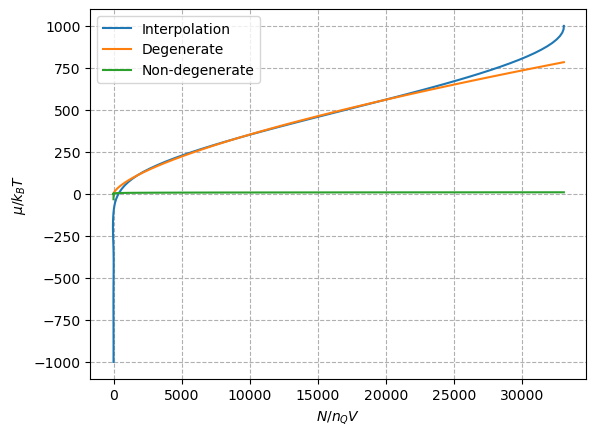

In [36]:
degenerate = ( ( (3*np.pi**2)**(2/3) )/(4*np.pi) ) * I_cubic_interp**(2/3)
non_degenerate = np.log(0.5*I_cubic_interp)

#from interpolation
#plt.figure(figsize=(10,8))
plt.plot(I_cubic_interp, mu_interp, label='Interpolation')
plt.grid(linestyle='--')
#plt.ylim(0)
plt.xlabel('$N/n_QV$')
plt.ylabel('$\mu/k_BT$')


plt.plot(I_cubic_interp, degenerate, label = 'Degenerate')
plt.plot(I_cubic_interp, non_degenerate, label='Non-degenerate')
plt.legend()
plt.show()

The comparison plotted above suggests the interpolated $\mu/k_BT$ values are in agreement with the analytic limits of **degenerate** fermions. The non-degenerate limit is completely off. 

**parameter space limit 1%**

Use 
$$
\text{Error} = \dfrac{\mu_{\text{numerical}} - \mu_{\text{analytic}}}{ \mu_{\text{analytic}}} \times 100 \le 1
$$

to determine the values of $N/Tn_Q$ at which the limits are accurate.

Then, those values can be used to determine parameters like $T$ at which the limits are accurate.

Values at which degenerate limit is accurate to 1% =  
 [ 1762.27399084  7451.52762501  8289.24434136  9156.23089729
 10049.25666229 10965.09100586 11900.5032975  12852.26290673
 13817.13920303 14791.9015559  15773.31933486 16758.16190939
 17743.19864901 18725.19892321 19700.93210149 20667.16755335
 21620.6746483 ]


Values at which non-degenerate limit is accurate to 1% =  
 [1.46643992e+00 1.63403305e+00 8.37965668e-01 1.88542275e+00
 3.55271368e-14]


C:\Users\laura\AppData\Local\Temp\ipykernel_19196\1885968723.py:3: RuntimeWarning: divide by zero encountered in true_divide
  ind_deg_param = np.where((abs(mu_interp-degenerate)/degenerate)*100 <= 1)
C:\Users\laura\AppData\Local\Temp\ipykernel_19196\1885968723.py:4: RuntimeWarning: invalid value encountered in true_divide
  ind_nondeg_param = np.where((abs(mu_interp-non_degenerate)/non_degenerate)*100 <= 1)


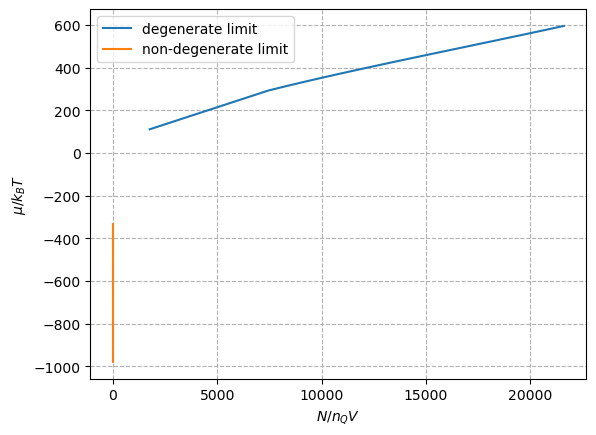

In [59]:
# determine N/Vn_Q for which the error is <=1%

ind_deg_param = np.where((abs(mu_interp-degenerate)/degenerate)*100 <= 1)
ind_nondeg_param = np.where((abs(mu_interp-non_degenerate)/non_degenerate)*100 <= 1)

N_deg = I_cubic_interp[ind_deg_param]
N_nondeg = I_cubic_interp[ind_nondeg_param]

print('Values at which degenerate limit is accurate to 1% = ', '\n', N_deg)
print('\n')
print('Values at which non-degenerate limit is accurate to 1% = ', '\n',  N_nondeg)

plt.plot(N_deg, mu_interp[ind_deg_param], label='degenerate limit')
plt.plot(N_nondeg, mu_interp[ind_nondeg_param], label='non-degenerate limit')
plt.legend()
plt.ylabel('$\mu/k_BT$')
plt.xlabel('$N/n_QV$')
plt.grid(linestyle='--')

We can see that the non-degenerate limit is accurate at non-physical values of $N/n_QT$. 

# 3. Sampling Maxwell-Boltzmann distribution

Algorithm used for sampling:

**Rejection method**

The goal of algorithm defined below is to generate 10$\times$N random points that are uniformly distributed in the $(v, y)$ plane and only accept points that lie within the curve $y=f(v)$, where $f$ is the Maxwell-Boltzmann distribution. The $v$ values accepted will be distributed according to $f$. 

To make sure the algorithm returns N samples, $v$ and $y$ are arrays of 10$\times$N random numbers. We then only take the first N accepted values of $v$.

Additionally, in order for this method to work for the Maxwell-Boltzmann distibution, we must generate $v$ and $y$ in the right order of magnitude. This means, $v$ goes from 0 to ~2500 and $y$ is in the order of $10^{-3}$.



In [75]:
# (a) 

# define distribution
def MaxwellBoltzmann_dist3D(v):
    '''3D Maxwell Botlzmann distribution, takes velocity v'''
    
    #constants
    k_B = 1.38e-23 #J K^-1
    T = 293 #K
    m = 1e-26 #kg order of magnitude for air molecule
    
    factor = (m / (2*np.pi*k_B*T))**(3/2) * 4*np.pi
    return factor * (v**2) * np.exp((-m*v**2) / (2*k_B*T))

In [80]:
# define plotting function for histogram

def plot_distribution(x, func):
    plt.clf()
    plt.hist(x, density=True, bins=100, histtype = 'step')
    xx = np.linspace(min(x), max(x), 100)
    plt.plot(xx, func(xx),':')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('V')
    plt.ylabel('Distribution')
    plt.title('Maxwell-Boltzmann')
    plt.show()

We found N or more samples. Will return the first N =  10000


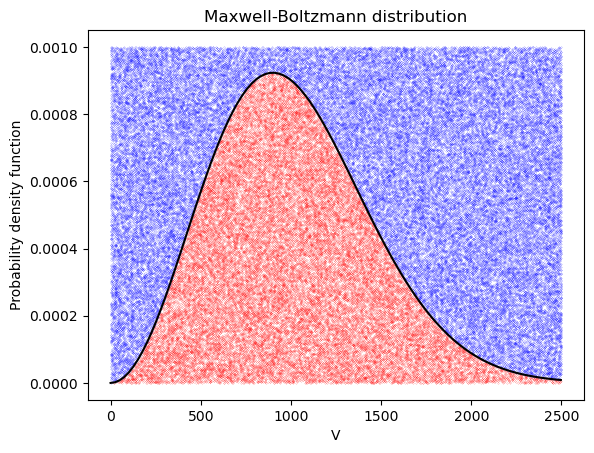

We have  10000  samples returned.


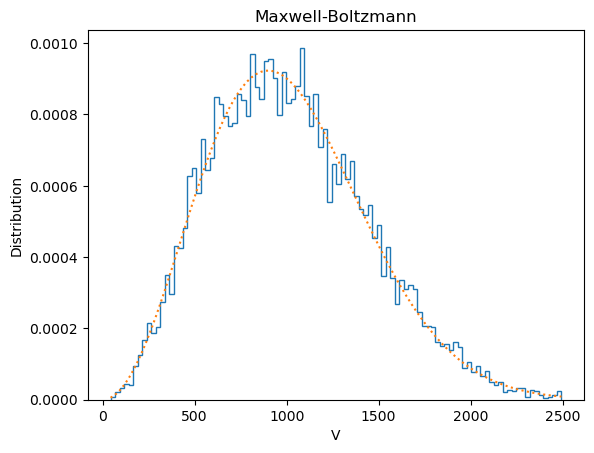

In [125]:
# try rejection method

seed = 15
rng = np.random.default_rng(seed)

def rejection(Nsamples, plot=True):
    #generate random numbers
    #generate 10*N to make sure we get N acceptances
    v_r = 2500*rng.uniform(size = 10*Nsamples) #velocities
    y_r = 0.001*rng.uniform(size = 10*Nsamples) 

    
    ind = np.where(y_r <= MaxwellBoltzmann_dist3D(v_r))
    ind2 = np.where(y_r > MaxwellBoltzmann_dist3D(v_r))
    
    if len(ind[0]) >= Nsamples:
 
        
        if plot:
            print('We found N or more samples. Will return the first N = ', Nsamples)
            #plot points to show which are accepted/rejected
            plt.plot(v_r[ind2], y_r[ind2], 'bo', ms=0.1) #rejected
            plt.plot(v_r[ind], y_r[ind], 'ro', ms=0.1) #accepted

            # Plot the analytic solution for the boundary (see below)
            vv = np.linspace(0.0, max(v_r[ind]), 100)
            plt.plot(vv, MaxwellBoltzmann_dist3D(vv), 'k')
            plt.xlabel('V')
            plt.ylabel('Probability density function')
            plt.title('Maxwell-Boltzmann distribution')
            plt.show()

        #return accepted points
        return v_r[ind][0:Nsamples]
    
    else:
        print('We found less than N samples')
        None

        
#sample, call for N
V = rejection(10**4)

#check we have the right number of samples
print('We have ', len(V), ' samples returned.')

# (b) plot histogram
plot_distribution(V, MaxwellBoltzmann_dist3D)

In [126]:
# (c) Average velocity of sample
V_sample_avg = np.average(V)

#compare with analytic result
k_B = 1.38e-23 #J K^-1
T = 293 #K
m = 1e-26 #kg order of magnitude for air molecule

V_analytic = ((8 * k_B * T)/(np.pi * m))**0.5

print('Sample average velocity = ', V_sample_avg)
print('Analytic velocity = ', V_analytic)
print('Difference in average velocity = ', abs(V_sample_avg - V_analytic))

Sample average velocity =  1016.1325392772524
Analytic velocity =  1014.7134349344308
Difference in average velocity =  1.4191043428215835


We found N or more samples. Will return the first N =  100


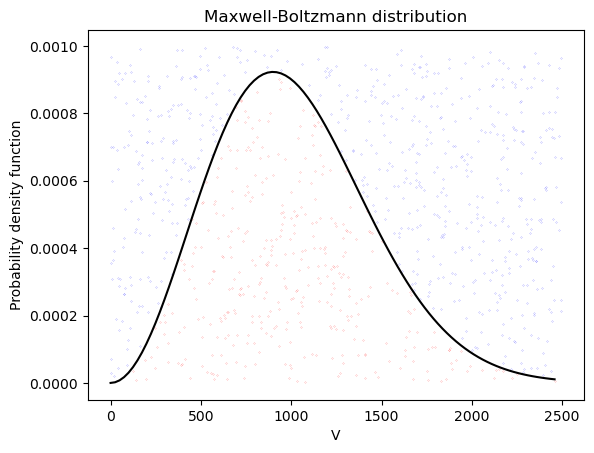

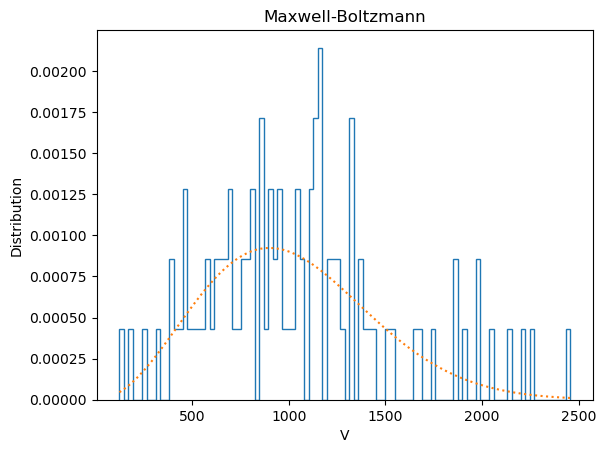

We found N or more samples. Will return the first N =  1000


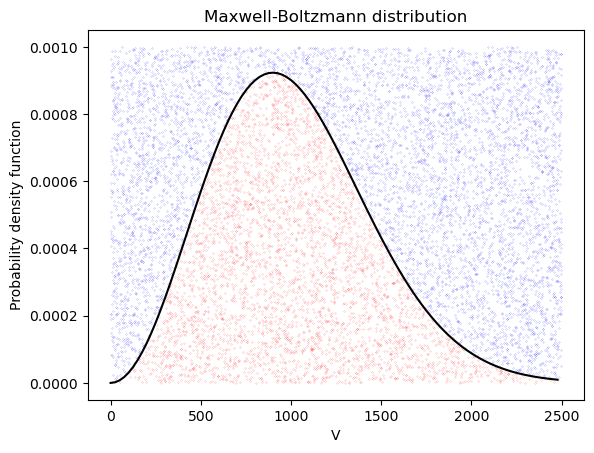

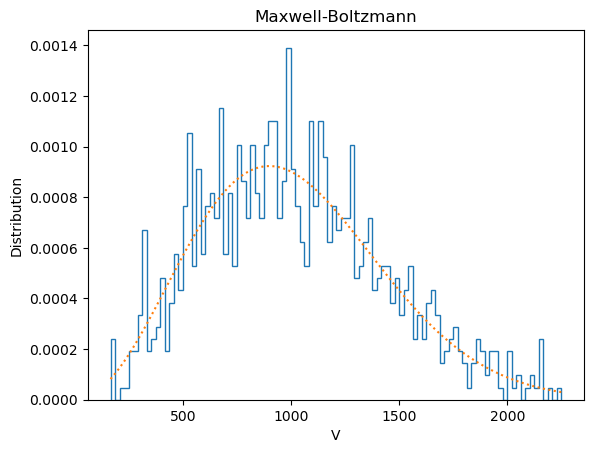

We found N or more samples. Will return the first N =  10000


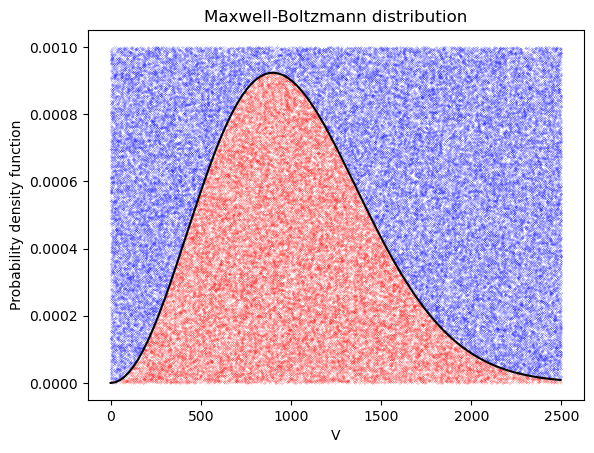

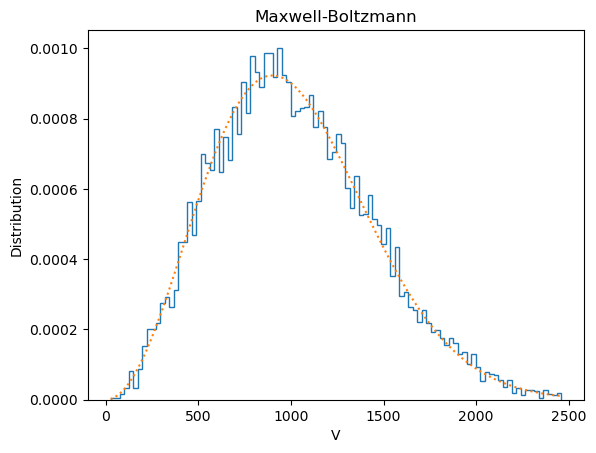

We found N or more samples. Will return the first N =  100000


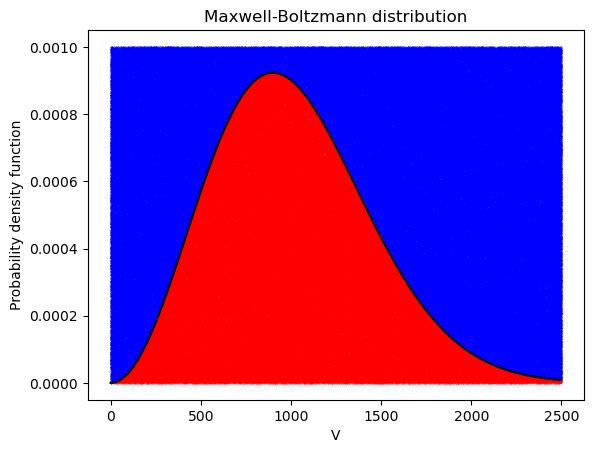

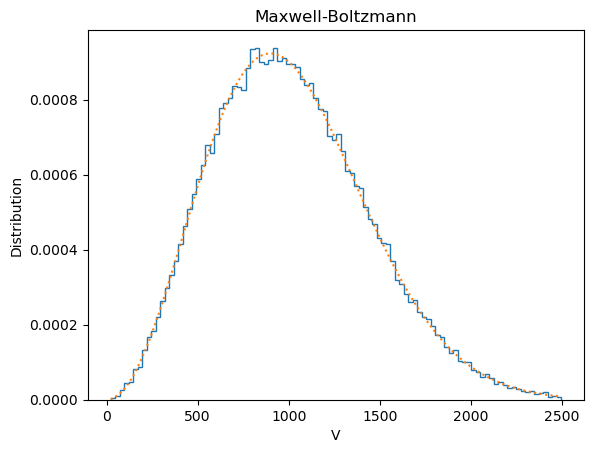

We found N or more samples. Will return the first N =  1000000


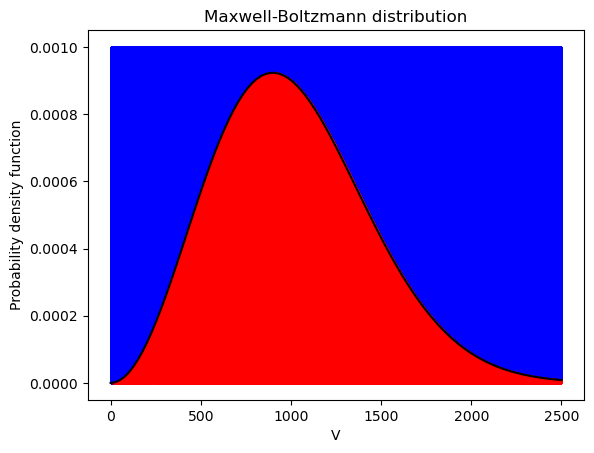

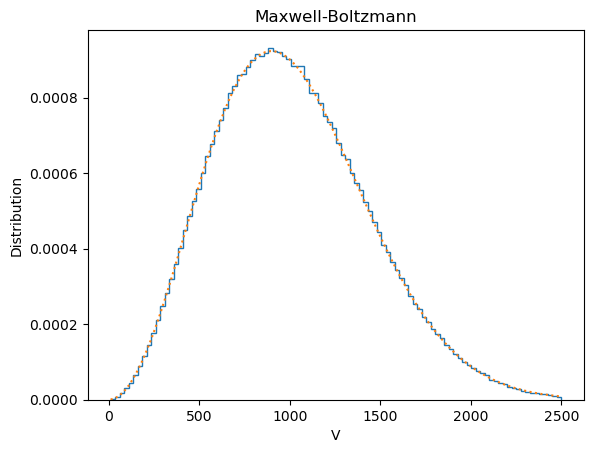

In [137]:
# How does error in average velocity depend on number of sample points

N = np.array([10**2, 10**3, 10**4, 10**5, 10**6])
v_avg = np.zeros(len(N))

for i,n in enumerate(N):
    v = rejection(int(n), plot=True) #call function
    v_avg[i] = np.average(v)
    plot_distribution(v, MaxwellBoltzmann_dist3D)

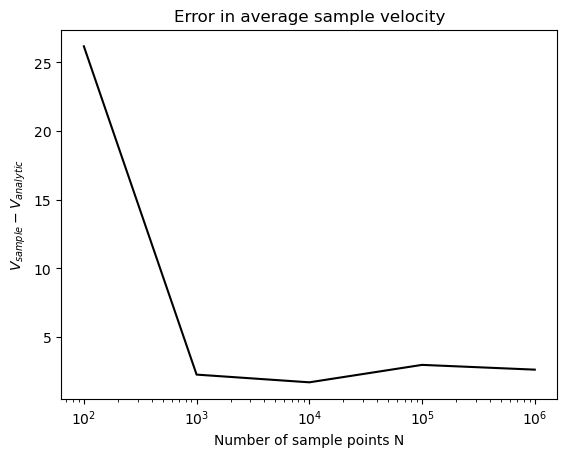

In [140]:
#plot as function of N

#plt.plot(N, v_avg, 'k')
#plt.ylabel('Average sample velocity')
#plt.xlabel('Number of sample points N')
#plt.xscale('log')
#plt.yscale('log')
#plt.show()


plt.plot(N, abs(V_analytic-v_avg), 'k')
plt.title('Error in average sample velocity')
plt.xlabel('Number of sample points N')
plt.ylabel('$V_{sample} - V_{analytic}$')
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [141]:
# this doesn't look too smooth, I will try more points

N = np.linspace(10**2, 10**6, 100)
v_avg = np.zeros(len(N))

for i,n in enumerate(N):
    v = rejection(int(n), plot=False) #call function
    v_avg[i] = np.average(v)
    # not plotting anything because it is too many 

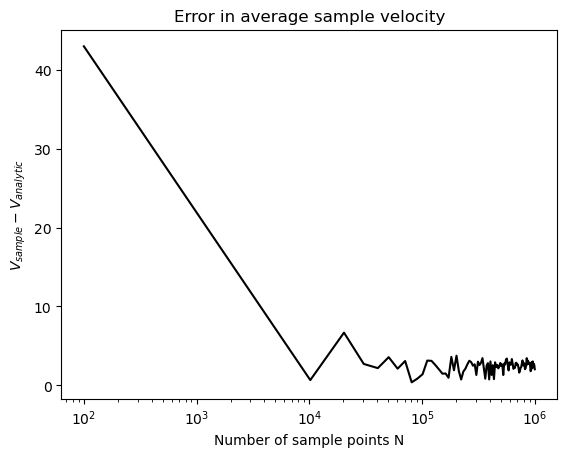

In [144]:
#plot as function of N
plt.plot(N, abs(V_analytic-v_avg), 'k')
plt.title('Error in average sample velocity')
plt.xlabel('Number of sample points N')
plt.ylabel('$V_{sample} - V_{analytic}$')
plt.xscale('log')
#plt.yscale('log')
plt.show()

We can see that the error averages out. Take a closer look!

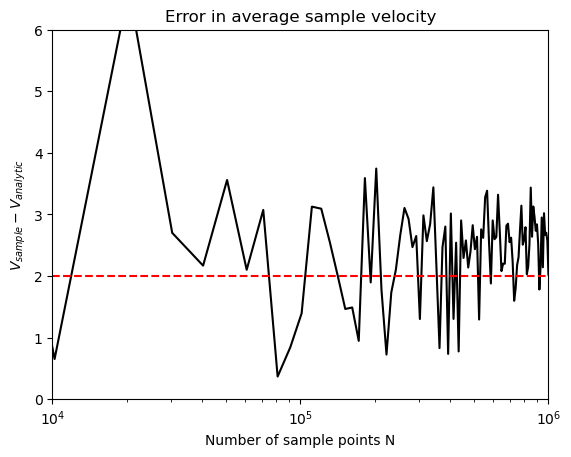

In [156]:
plt.plot(N, abs(V_analytic-v_avg), 'k')
plt.ylim(0, 6)
plt.xlim(10**4, 10**6)
plt.axhline(y=2, linestyle='--', color='r')
plt.title('Error in average sample velocity')
plt.xlabel('Number of sample points N')
plt.ylabel('$V_{sample} - V_{analytic}$')
plt.xscale('log')
#plt.yscale('log')
plt.show()

Indeed it seems to average around 2 